<a href="https://colab.research.google.com/github/Marlrero/AI_PrimaryEducation/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Keras DNN으로 집 값 예측하기

#### 1.Import package

In [1]:
import pandas as pd  # 수학 패키지
import matplotlib.pyplot as plt # 그래프 패키지
import seaborn as sns # 그래프 패키지
from time import time # 시간 패키지

from keras.models import Sequential                  # 일렬로 쌓아서 구성하는 간단한 계층
from keras.layers import Dense                       # 완전 연결 계층
from sklearn.preprocessing import StandardScaler     # 데이터를 표준화함 (전처리)
from sklearn.model_selection import train_test_split # 훈련집합과 검증집합 분리

pd.set_option('display.max_columns', None)   # Pandas 출력에서 컬럼을 skip하지 않고 모두 출력

#### 2. Set hyperparameter

In [2]:
MY_HIDDEN = 1000  # Hidden Node 갯수
MY_EPOCH = 500    # epoch: 반복 횟수 (길면 정확도가 크고, 시간이 오래걸림)
MY_BATCH = 64     # Batch size: 신경망은 미니배치(샘플을 자른 것) 단위로 학습함

#### 3. Data preprocessing

In [3]:
# CSV 파일 읽기
raw = pd.read_csv('/content/drive/MyDrive/dataset/housing.csv')

# 행 10개만 출력
raw.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


In [4]:
# 데이터 통계 출력
raw.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


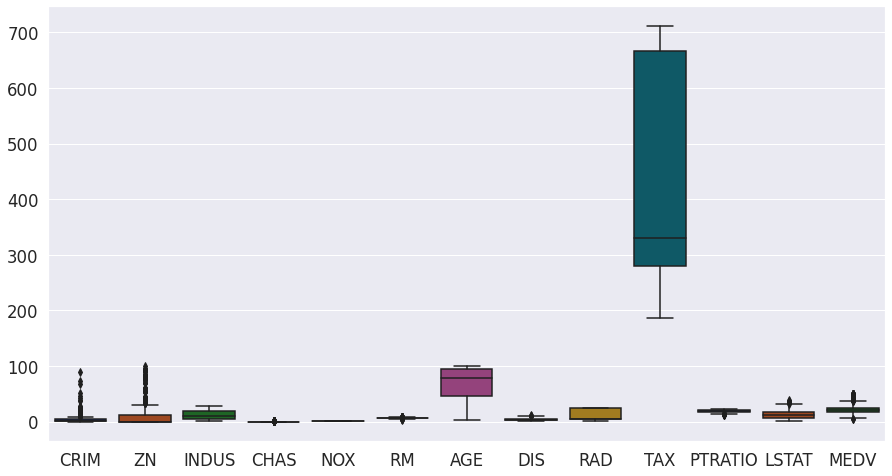

In [5]:
plt.figure(figsize=(15, 8)) # figure size
sns.set(font_scale=1.5) # font size
sns.boxplot(data=raw, palette='dark')

In [6]:
# z-점수 정규화
scaler = StandardScaler()
Z_data = scaler.fit_transform(raw) # pandas.Dataframe -> numpy.ndarray

# Data type
type(raw), type(Z_data)

(pandas.core.frame.DataFrame, numpy.ndarray)

* Pandas Dataframe: 2차원 행렬(테이블)에 특화된 타입으로 Numpy 행렬과 서로 호환됨
  - 타입 수용 여부: 다양한 타입이 가능
  - 인덱싱: 열의 이름(문자열)이나 숫자 모두 가능
  - 목적: 데이터 다양성 추구와 사용의 편리를 위함
* Numpy array(ndarray): N차원 행렬에 특화된 타입으로 행렬 처리에 주로 사용
  - 타입 수용 여부: 숫자 타입만 허용됨
  - 인덱싱: 숫자로만 가능
  - 목적: 빠른 과학/공학적 계산 가능

In [7]:
# numpy.ndarray -> pandas.DataFrame
Z_data = pd.DataFrame(Z_data)
type(Z_data)

pandas.core.frame.DataFrame

In [8]:
# 표준화된 데이터 샘플 10개
Z_data.head(10) # 열 이름이 없음!

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501,1.487503
5,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,-1.043322,0.671222
6,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,-0.031268,0.039964
7,-0.403696,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.910700,0.497082
8,-0.395935,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,2.421774,-0.656595
9,-0.400729,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.623344,-0.395385


In [9]:
heading = raw.columns.to_list() # Heading 정보 뽑기
# 다시 하는 이유: 다시 데이터프레임을 만드므로 데이터가 NaN으로 손실됨
Z_data = scaler.fit_transform(raw) # pandas.Dataframe -> numpy.ndarray
Z_data = pd.DataFrame(Z_data, columns=heading)
Z_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501,1.487503
5,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,-1.043322,0.671222
6,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,-0.031268,0.039964
7,-0.403696,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.910700,0.497082
8,-0.395935,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,2.421774,-0.656595
9,-0.400729,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.623344,-0.395385


In [10]:
Z_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.688702e-17,3.306534e-16,2.804081e-16,-3.100287e-16,-8.071058e-16,-5.978968e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.595123e-16,-4.247810e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,3.548771e+00,2.989460e+00


* StandardScaler: 표준화 -> 평균을 0으로 만들고(-8.6e-17 ...) 표준편차를 1로 만들었음 => 모든 요소들의 범위가 비슷해지는 역할

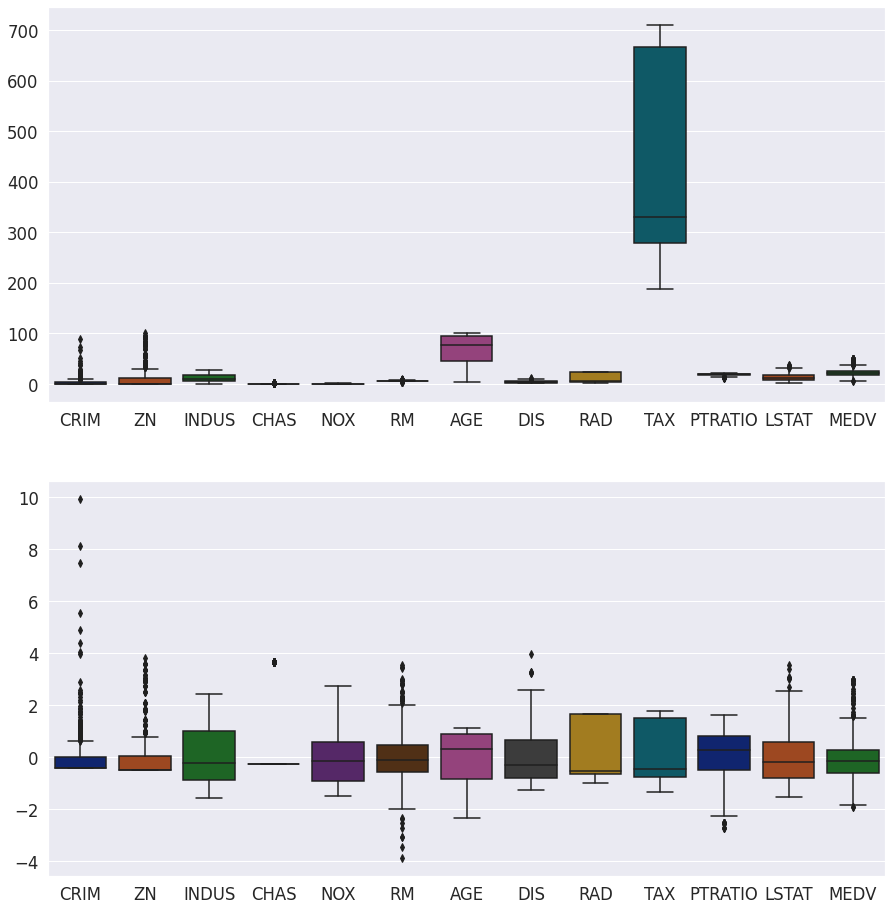

In [11]:
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(15, 16)
sns.boxplot(data=raw, palette='dark', ax=axes[0])
sns.boxplot(data=Z_data, palette='dark', ax=axes[1])

In [12]:
# 데이터 shape 출력
Z_data.shape # row: 506, col: 13 -> (506, 13)

(506, 13)

#### 4. prepare to Training set and Test set

In [13]:
# 데이터를 입력과 출력으로 분리
# MEDV: 평균 주택 가격
X_data = Z_data.drop('MEDV', axis=1) # 훈련 데이터셋 (MEDV를 제외해야 함)
Y_data = Z_data['MEDV'] # 학습하여 맞춰야 하는 레이블 MEDV

print("훈련 데이터셋 차원:", X_data.shape)
print("레이블 차원:", Y_data.shape)

훈련 데이터셋 차원: (506, 12)
레이블 차원: (506,)


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)

# 506 * 0.7 = 354.2 => 354
# 506 * 0.3 = 151.8 => 152
#             Total => 506
# Label: 1D
print("Training set shape:", X_train.shape)
print("Training label shape:", Y_train.shape)
print("Test set shape:", X_test.shape)
print("Test label shape:", Y_test.shape)

Training set shape: (354, 12)
Training label shape: (354,)
Test set shape: (152, 12)
Test label shape: (152,)


#### 5. create Model (DNN)

In [15]:
model = Sequential()  # 순차적인 모델 구성

input = X_train.shape[1] # 12개 입력 노드
# Dense: 입력과 출력을 모두 연결해주는 레이어 (Fully Connected 완전 연결)
# units: 뉴런 개수, input_dim: 입력 개수(차원), activation: 활성화함수
model.add(Dense(name='HiddenLayer1', units=MY_HIDDEN, input_dim=input, activation='relu'))
model.add(Dense(name='HiddenLayer2', units=MY_HIDDEN, activation='relu'))
model.add(Dense(name='OutputLayer', units=1))

model.summary() # 모델 층 구성 보기

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 1000)              13000     
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 1000)              1001000   
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 1001      
Total params: 1,015,001
Trainable params: 1,015,001
Non-trainable params: 0
_________________________________________________________________


* HiddenLayer1 = 12개 입력 노드 * 1000개 노드 + 1000개 편향 = 13000개
* HiddenLayer2 = 1000개 HiddenLayer1 노드 * 1000개 노드 + 1000개 편향 = 1001000개
* OutputLayer = 1000개 HiddenLayer2 노드 * 1개 노드 + 1개 편향 = 1001개
Total: 13000 + 1001000 + 1001 = 1015001

#### 6. Model training

In [16]:
# optimizer: sgd(Stochastic Gradient Descent)
# loss: mse(Mean Squared Error)
model.compile(optimizer='sgd', loss='mse')

begin = time() # 학습시간 측정
# 학습 진행
# x, y: 훈련 데이터, 훈련 타깃(레이블)
# epochs: 반복횟수
# batch_size: 배치(데이터를 몇 개씩 묶음) -> 속도 빠름
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0)
end = time() # 학습시간 측정
print("총 학습 시간: {:.1f}sec".format(end - begin))

총 학습 시간: 6.2sec


* 수정(Edit) -> 노트 설정(Note Settings) -> GPU/TPU 모드 설정 가능 (모든 코드를 다시 실행해야 함)

#### 7. Model evaluation

In [17]:
# 손실함수의 값 계산 (검증 데이터 사용)
# 손실함수가 작은 것이 좋은 모델
loss = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Mean Squared Error: {:.2f}".format(loss))

Mean Squared Error: 0.12


In [18]:
# Pandas dataframe 특정 행 인덱스 추출은 loc[], 열 추출은 iloc[]
#print("첫 번째 평가용 데이터 입력:")
#print(X_test.loc[0])
#print("\n첫 번째 평가용 데이터 출력:")
#print(Y_test.loc[0])

#### 8. predict (using Model)

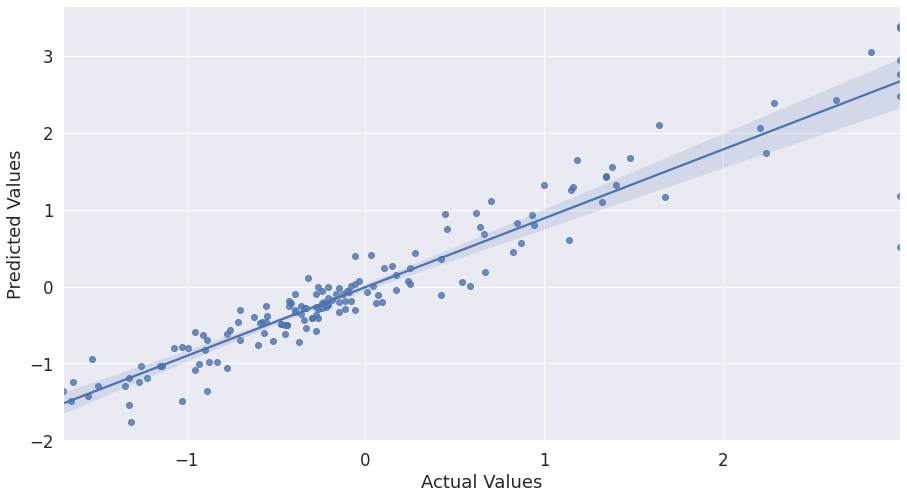

In [19]:
pred = model.predict(x=X_test)

# Scatter plot 출력
plt.figure(figsize=(15, 8)) # figure size
sns.regplot(x=Y_test, y=pred) # 정답, 추측값
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

* 회귀(Regression) 문제에서 오차 지표(MSE, MAE 등)만 보고 좋은 모델 판별 불가함. 산포도를 보는 것(정확도를 시각화)이 중요함.
* 실제 정답(x)과 추측한 값(y)이 산포도 결과 양의 상관관계(+1에 가까운 값)가 나옴
  - 정답과 모델이 추측한 값과 거의 비슷하다.
  - 모델이 잘 만듦. 하지만 완벽하진 않음. 직선과 가깝지 않은 선은 틀린 것임.
  - 완벽한 모델: 직선(y=x)이 완벽히 점에 있어야 함. MSE는 0임.

#### 실습 문제

총 학습 시간: 0.0sec
Mean Squared Error: 1.19


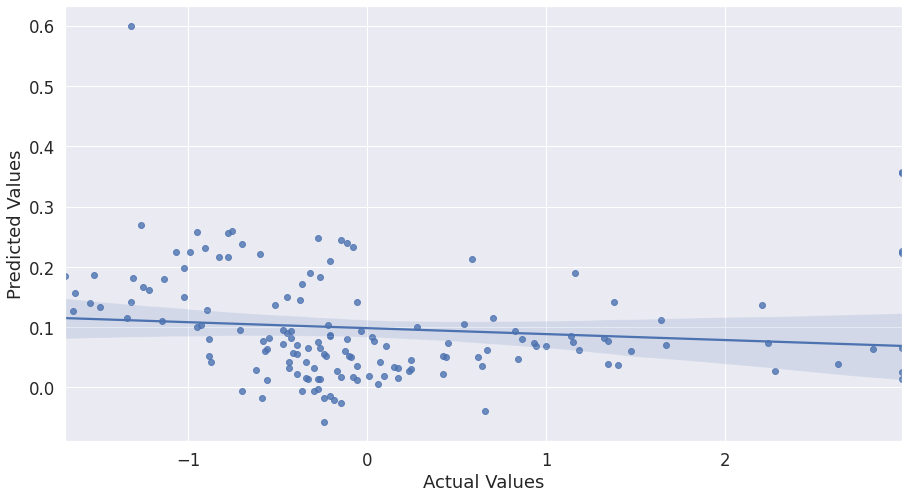

In [20]:
model = Sequential()  # 순차적인 모델 구성

input = X_train.shape[1]
model.add(Dense(name='HiddenLayer1', units=MY_HIDDEN, input_dim=input, activation='relu'))
model.add(Dense(name='HiddenLayer2', units=MY_HIDDEN, activation='relu'))
model.add(Dense(name='OutputLayer', units=1))

model.compile(optimizer='sgd', loss='mse')

begin = time() # 학습시간 측정
model.fit(x=X_train, y=Y_train, epochs=0, batch_size=MY_BATCH, verbose=0) # epoch = 0
end = time() # 학습시간 측정
print("총 학습 시간: {:.1f}sec".format(end - begin))

loss = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Mean Squared Error: {:.2f}".format(loss))
pred = model.predict(x=X_test)

# Scatter plot 출력
plt.figure(figsize=(15, 8)) # figure size
sns.regplot(x=Y_test, y=pred) # 정답, 추측값
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Mean Squared Error: 0.14


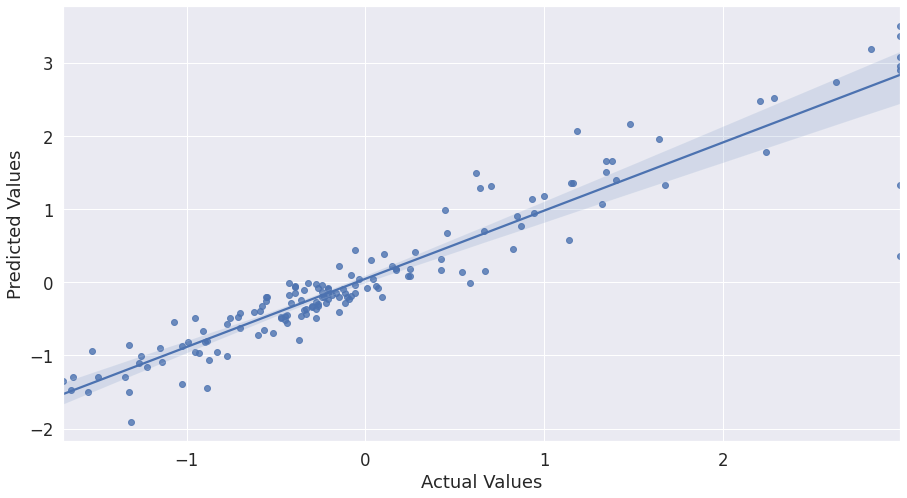

In [21]:
model = Sequential()  # 순차적인 모델 구성

input = X_train.shape[1]
model.add(Dense(name='HiddenLayer1', units=MY_HIDDEN, input_dim=input, activation='relu'))
model.add(Dense(name='HiddenLayer2', units=MY_HIDDEN, activation='relu'))
model.add(Dense(name='OutputLayer', units=1))

model.compile(optimizer='sgd', loss='mse')
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=16, verbose=0) # batch_size=16
loss = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Mean Squared Error: {:.2f}".format(loss))
pred = model.predict(x=X_test)

# Scatter plot 출력
plt.figure(figsize=(15, 8)) # figure size
sns.regplot(x=Y_test, y=pred) # 정답, 추측값
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 1000)              13000     
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 1000)              1001000   
_________________________________________________________________
HiddenLayer3 (Dense)         (None, 500)               500500    
_________________________________________________________________
HiddenLayer4 (Dense)         (None, 500)               250500    
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 501       
Total params: 1,765,501
Trainable params: 1,765,501
Non-trainable params: 0
_________________________________________________________________
None
총 학습 시간: 5.0sec
Mean Squared Error: 0.13


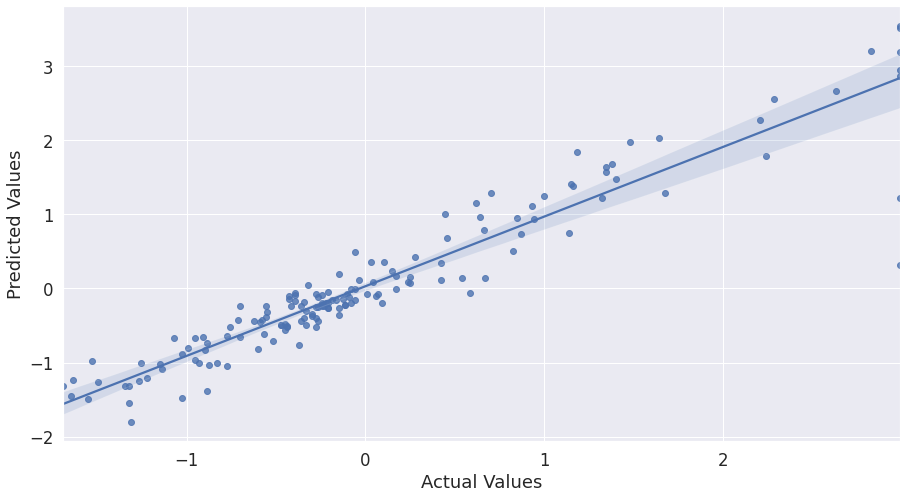

In [22]:
model = Sequential()  # 순차적인 모델 구성

input = X_train.shape[1]
model.add(Dense(name='HiddenLayer1', units=MY_HIDDEN, input_dim=input, activation='relu'))
model.add(Dense(name='HiddenLayer2', units=MY_HIDDEN, activation='relu'))
model.add(Dense(name='HiddenLayer3', units=500, activation='relu')) # 추가
model.add(Dense(name='HiddenLayer4', units=500, activation='relu')) # 추가
model.add(Dense(name='OutputLayer', units=1))
print(model.summary())

model.compile(optimizer='sgd', loss='mse')

begin = time() # 학습시간 측정
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0) # epoch = 0
end = time() # 학습시간 측정
print("총 학습 시간: {:.1f}sec".format(end - begin))

loss = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Mean Squared Error: {:.2f}".format(loss))
pred = model.predict(x=X_test)

# Scatter plot 출력
plt.figure(figsize=(15, 8)) # figure size
sns.regplot(x=Y_test, y=pred) # 정답, 추측값
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Training set shape: (354, 12)
Training label shape: (354,)
Test set shape: (152, 12)
Test label shape: (152,)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 1000)              13000     
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 1000)              1001000   
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 1001      
Total params: 1,015,001
Trainable params: 1,015,001
Non-trainable params: 0
_________________________________________________________________
None
Mean Squared Error: nan


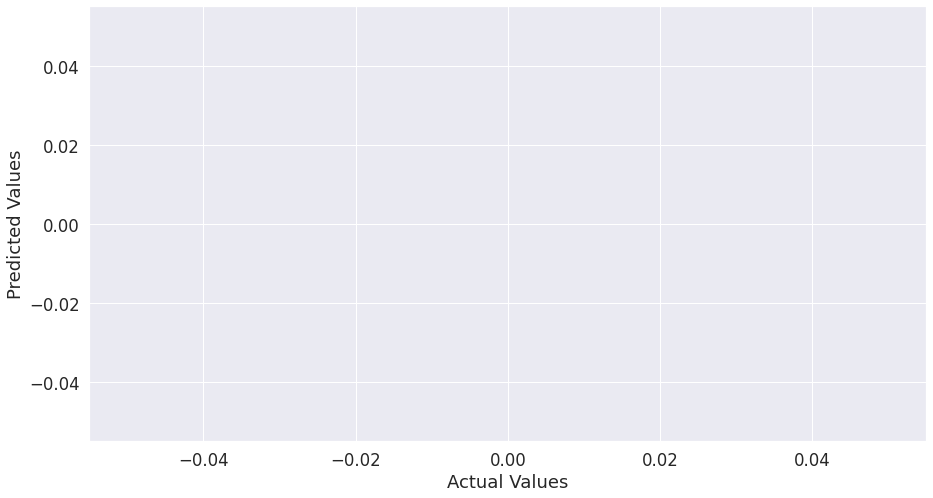

In [23]:
raw = pd.read_csv('/content/drive/MyDrive/dataset/housing.csv')
X_data = raw.drop('MEDV', axis=1) # 훈련 데이터셋 (MEDV를 제외해야 함)
Y_data = raw['MEDV'] # 학습하여 맞춰야 하는 레이블 MEDV
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)

print("Training set shape:", X_train.shape)
print("Training label shape:", Y_train.shape)
print("Test set shape:", X_test.shape)
print("Test label shape:", Y_test.shape)

model = Sequential()  # 순차적인 모델 구성

input = X_train.shape[1]
model.add(Dense(name='HiddenLayer1', units=MY_HIDDEN, input_dim=input, activation='relu'))
model.add(Dense(name='HiddenLayer2', units=MY_HIDDEN, activation='relu'))
model.add(Dense(name='OutputLayer', units=1))
print(model.summary())

model.compile(optimizer='sgd', loss='mse')

model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0) # epoch = 0

loss = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Mean Squared Error: {:.2f}".format(loss))
pred = model.predict(x=X_test)

# Scatter plot 출력
plt.figure(figsize=(15, 8)) # figure size
sns.regplot(x=Y_test, y=pred) # 정답, 추측값
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

표준화를 하지 않으면 기계학습 자체가 안됨. NaN이 나옴.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 1000)              13000     
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 1000)              1001000   
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 1001      
Total params: 1,015,001
Trainable params: 1,015,001
Non-trainable params: 0
_________________________________________________________________
None
총 학습 시간: 4.4sec
Mean Squared Error: 0.23


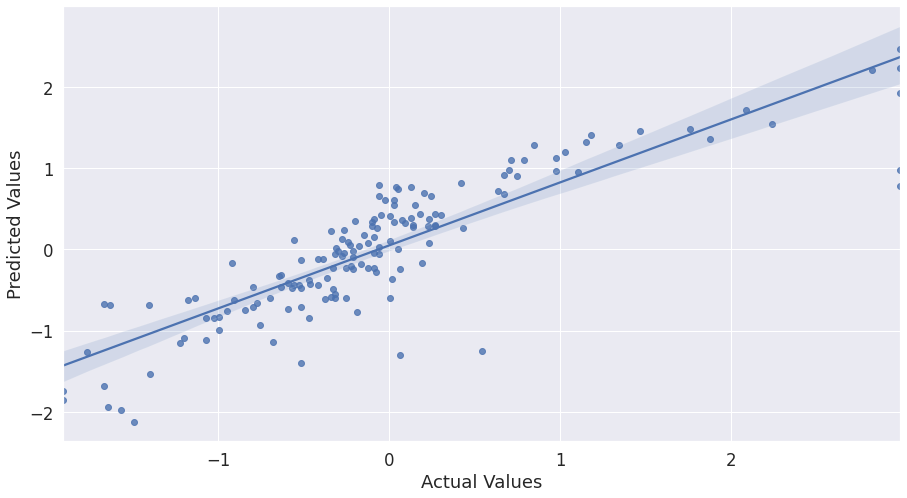

In [24]:
heading = raw.columns.to_list() # Heading 정보 뽑기
# 다시 하는 이유: 다시 데이터프레임을 만드므로 데이터가 NaN으로 손실됨
Z_data = scaler.fit_transform(raw) # pandas.Dataframe -> numpy.ndarray
Z_data = pd.DataFrame(Z_data, columns=heading)

X_data = Z_data.drop('MEDV', axis=1) # 훈련 데이터셋 (MEDV를 제외해야 함)
Y_data = Z_data['MEDV'] # 학습하여 맞춰야 하는 레이블 MEDV
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)

model = Sequential()  # 순차적인 모델 구성

input = X_train.shape[1]
model.add(Dense(name='HiddenLayer1', units=MY_HIDDEN, input_dim=input)) # relu 삭제 (기본값은 가중치와 입력을 연산한 것 = linear)
model.add(Dense(name='HiddenLayer2', units=MY_HIDDEN)) # relu 삭제 (기본값은 가중치와 입력을 연산한 것 = linear)
model.add(Dense(name='OutputLayer', units=1))
print(model.summary())

model.compile(optimizer='sgd', loss='mse')

begin = time() # 학습시간 측정
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0) # epoch = 0
end = time() # 학습시간 측정
print("총 학습 시간: {:.1f}sec".format(end - begin))

loss = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Mean Squared Error: {:.2f}".format(loss))
pred = model.predict(x=X_test)

# Scatter plot 출력
plt.figure(figsize=(15, 8)) # figure size
sns.regplot(x=Y_test, y=pred) # 정답, 추측값
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 1000)              13000     
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 1000)              1001000   
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 1001      
Total params: 1,015,001
Trainable params: 1,015,001
Non-trainable params: 0
_________________________________________________________________
None
총 학습 시간: 4.5sec
Mean Squared Error: 0.00


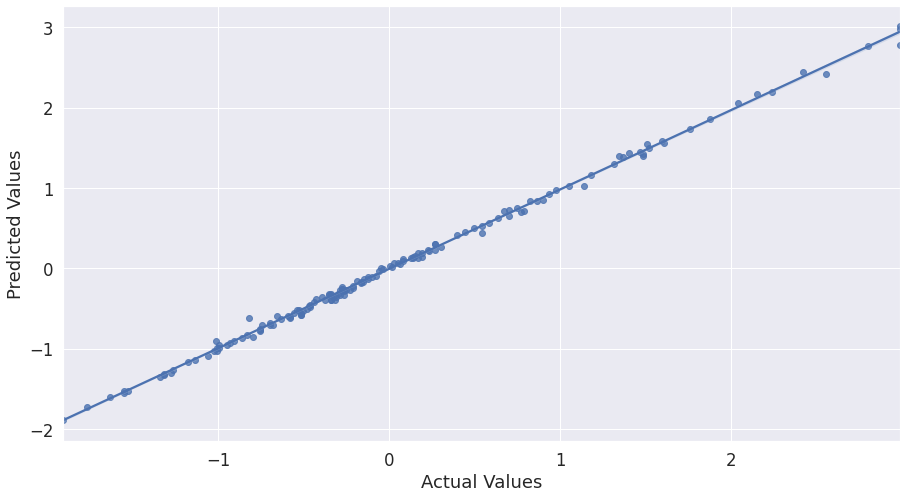

In [25]:
heading = raw.columns.to_list() # Heading 정보 뽑기
# 다시 하는 이유: 다시 데이터프레임을 만드므로 데이터가 NaN으로 손실됨
Z_data = scaler.fit_transform(raw) # pandas.Dataframe -> numpy.ndarray
Z_data = pd.DataFrame(Z_data, columns=heading)

X_data = Z_data.drop('MEDV', axis=1) # 훈련 데이터셋 (MEDV를 제외해야 함)
X_data = Z_data.drop('CRIM', axis=1)
Y_data = Z_data['MEDV'] # 학습하여 맞춰야 하는 레이블 MEDV
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)

model = Sequential()  # 순차적인 모델 구성

input = X_train.shape[1]
model.add(Dense(name='HiddenLayer1', units=MY_HIDDEN, input_dim=input, activation='relu'))
model.add(Dense(name='HiddenLayer2', units=MY_HIDDEN, activation='relu'))
model.add(Dense(name='OutputLayer', units=1))
print(model.summary())

model.compile(optimizer='sgd', loss='mse')

begin = time() # 학습시간 측정
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=0) # epoch = 0
end = time() # 학습시간 측정
print("총 학습 시간: {:.1f}sec".format(end - begin))

loss = model.evaluate(x=X_test, y=Y_test, verbose=0)
print("Mean Squared Error: {:.2f}".format(loss))
pred = model.predict(x=X_test)

# Scatter plot 출력
plt.figure(figsize=(15, 8)) # figure size
sns.regplot(x=Y_test, y=pred) # 정답, 추측값
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

CRIM(이상치가 많은 특성임)을 빼면 더 좋은 결과를 얻음